In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


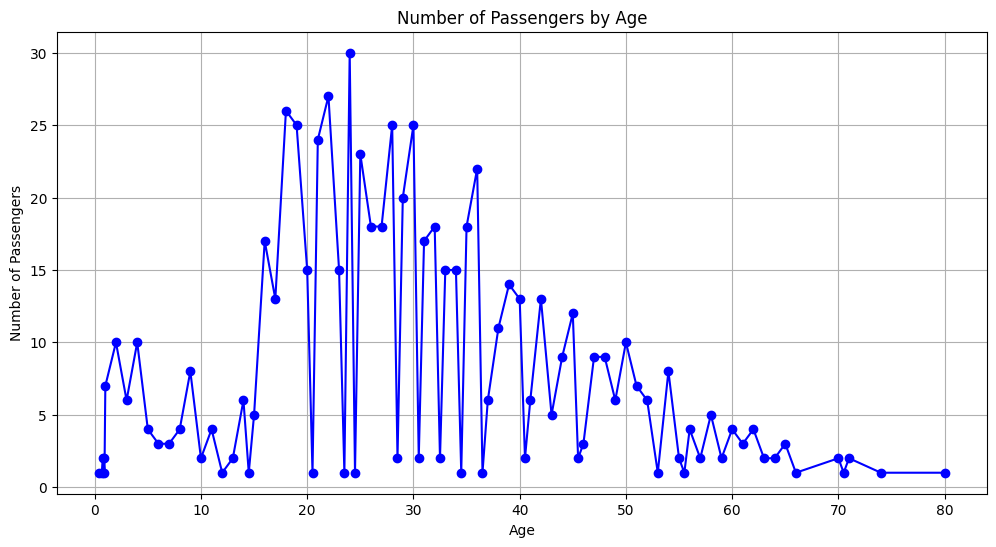

In [9]:
#Plot a line chart showing the number of passengers by age

age_counts = df['age'].dropna().value_counts().sort_index()
age_counts.head(10)  # see first few age counts

plt.figure(figsize=(12,6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

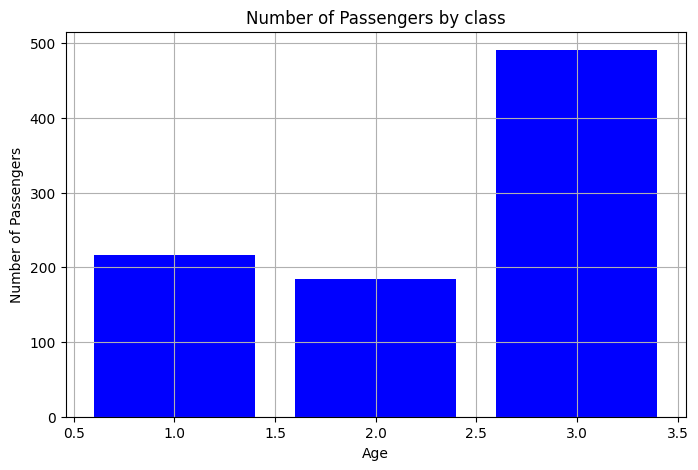

In [16]:
#Plot a bar chart showing the number of passengers by class

class_counts = df['pclass'].dropna().value_counts().sort_index()
class_counts.head(10)

plt.figure(figsize= (8, 5))
plt.bar(class_counts.index, class_counts.values, color='blue')
plt.title('Number of Passengers by class')
plt.xlabel('Class ')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

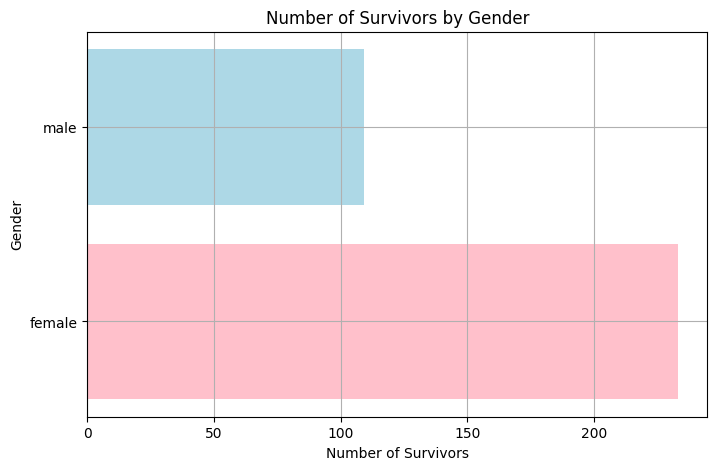

In [18]:
#Plot a horizontal bar chart showing the number of survivors (survived) by gender (sex).

survivor_counts = df.groupby('sex')['survived'].sum()
survivors_count


plt.figure(figsize= (8, 5))
plt.barh(survivor_counts.index, survivor_counts.values, color=['pink','lightblue'])

plt.title('Number of Survivors by Gender')
plt.xlabel('Number of Survivors')
plt.ylabel('Gender')
plt.grid(True)
plt.show()

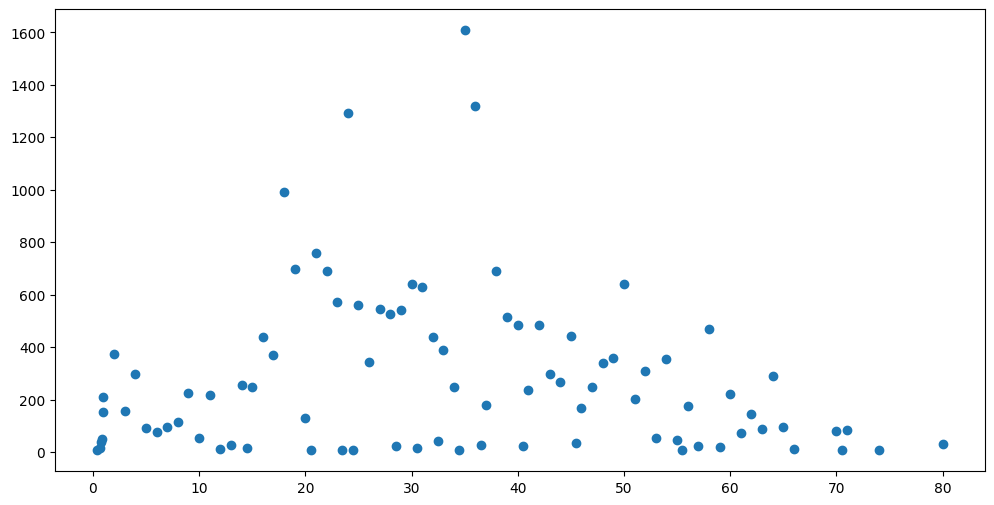

In [22]:
#Plot a scatter plot showing relationship between age and fare.

relationship = df.groupby('age')['fare'].sum()

plt.figure(figsize= (12, 6))
plt.scatter(relationship.index, relationship.values)

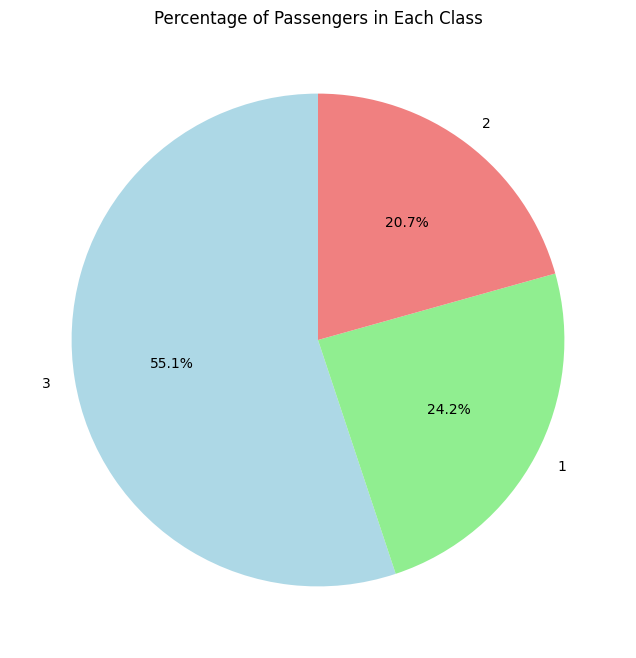

In [28]:
#Draw a pie chart showing percentage of passengers in each class

passengers_counts = df['pclass'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(passengers_counts.values, 
        labels=passengers_counts.index,   # labels for each slice
        autopct='%1.1f%%',                # show percentages
        startangle=90,                     # rotate start
        colors=['lightblue', 'lightgreen', 'lightcoral'],
       ) 

plt.title('Percentage of Passengers in Each Class')
plt.show()


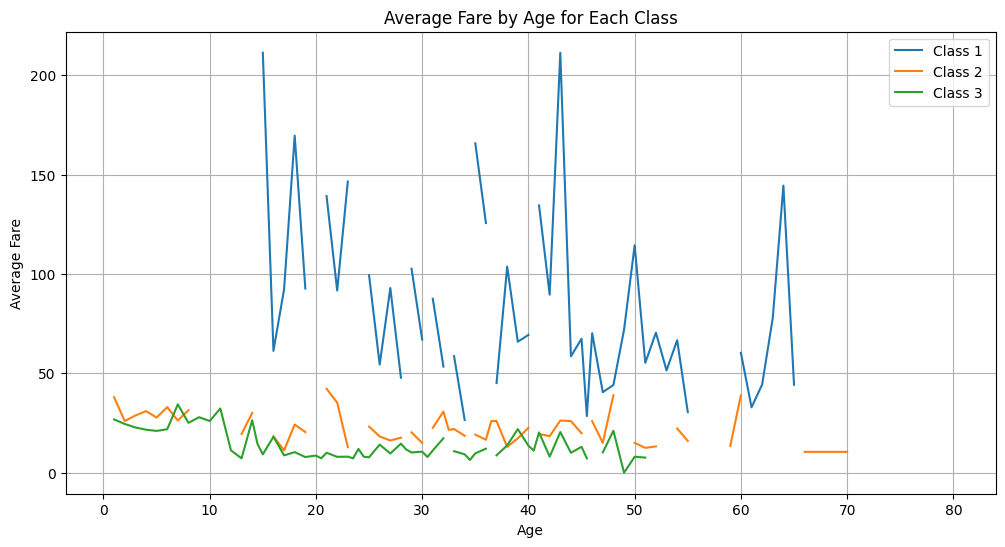

In [29]:
#Multiple line plots comparing average fare by age for each class

df_age = df.dropna(subset=['age', 'fare', 'pclass'])

# Calculate average fare by age and class
avg_fare = df_age.groupby(['age','pclass'])['fare'].mean().unstack()

# Plot multiple lines
plt.figure(figsize=(12,6))
for col in avg_fare.columns:
    plt.plot(avg_fare.index, avg_fare[col], label=f'Class {col}')

plt.title('Average Fare by Age for Each Class')
plt.xlabel('Age')
plt.ylabel('Average Fare')
plt.legend()
plt.grid(True)
plt.show()


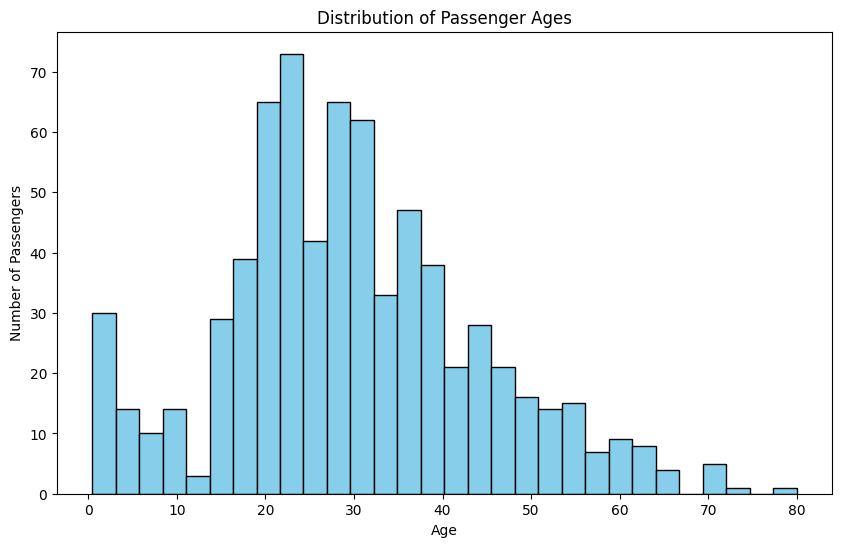

In [30]:
#Histogram of passenger ages

plt.figure(figsize=(10,6))
plt.hist(df['age'].dropna(), bins = 30, color='skyblue', edgecolor='black')

plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


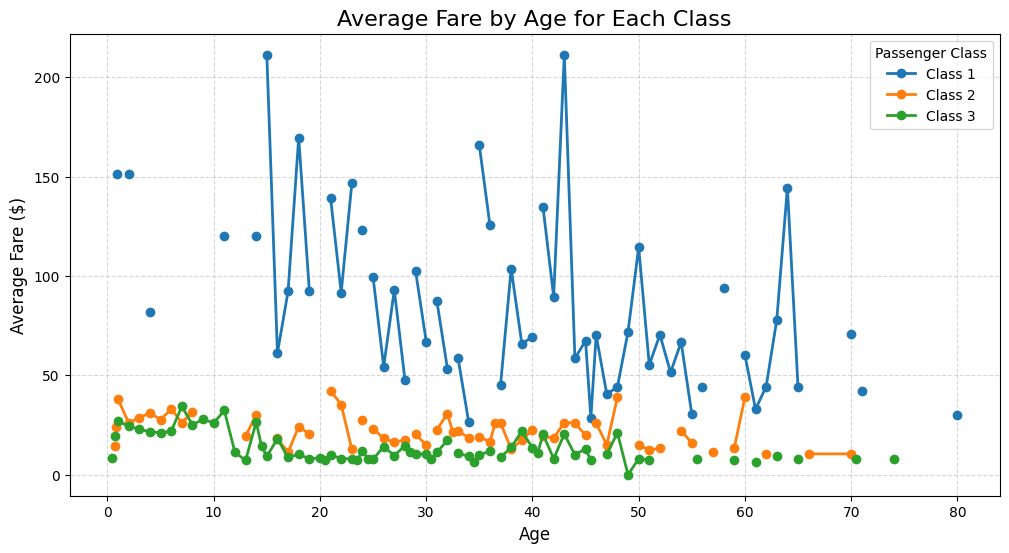

In [31]:
#Add title, labels, legend, and grid

plt.figure(figsize=(12,6))
for col in avg_fare.columns:
    plt.plot(avg_fare.index, avg_fare[col], label=f'Class {col}', linewidth=2, marker='o')

plt.title('Average Fare by Age for Each Class', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.legend(title='Passenger Class')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


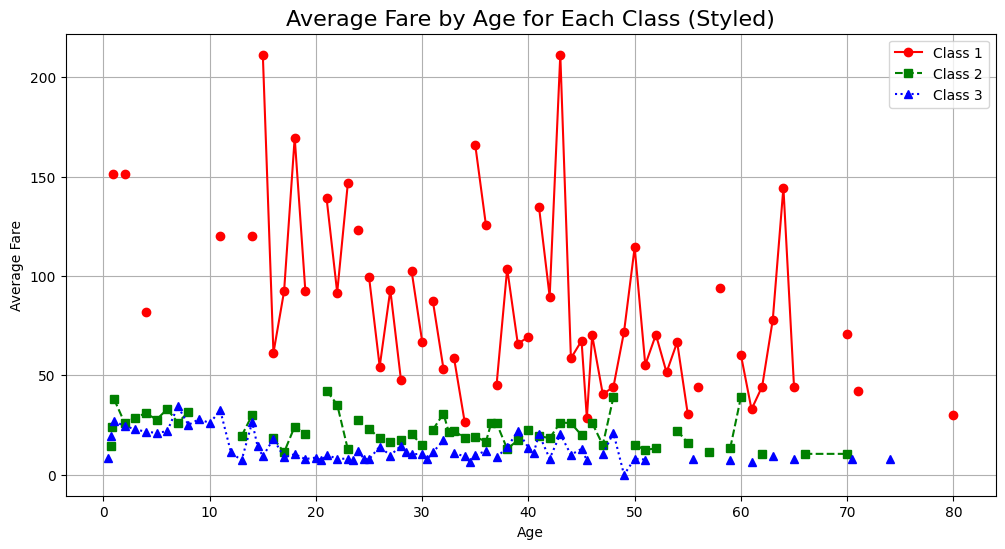

In [32]:
#Customize colors and line styles

plt.figure(figsize=(12,6))
plt.plot(avg_fare.index, avg_fare[1], color='red', linestyle='-', marker='o', label='Class 1')
plt.plot(avg_fare.index, avg_fare[2], color='green', linestyle='--', marker='s', label='Class 2')
plt.plot(avg_fare.index, avg_fare[3], color='blue', linestyle=':', marker='^', label='Class 3')

plt.title('Average Fare by Age for Each Class (Styled)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Average Fare')
plt.legend()
plt.grid(True)
plt.show()


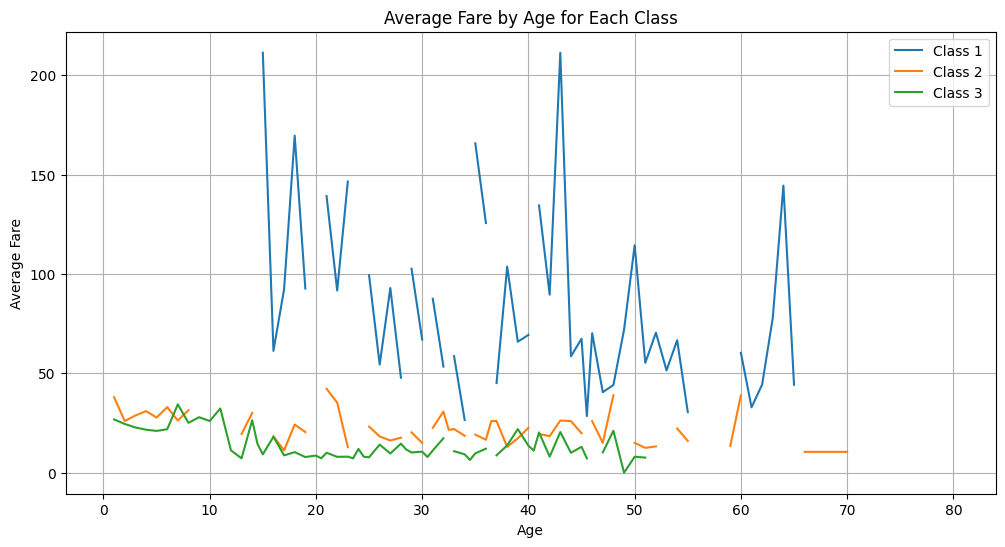

In [33]:
#Save a chart as an image file titanic_plot.png

plt.figure(figsize=(12,6))
for col in avg_fare.columns:
    plt.plot(avg_fare.index, avg_fare[col], label=f'Class {col}')

plt.title('Average Fare by Age for Each Class')
plt.xlabel('Age')
plt.ylabel('Average Fare')
plt.legend()
plt.grid(True)

# Save figure
plt.savefig('titanic_plot.png', dpi=300, bbox_inches='tight')
plt.show()
